## EENG 439: Neural Networks and Learning Systems Final Project

### Corn Future Predictions using Convolutional Neural Networks

In [181]:
# Install Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime, timedelta
import pickle

In [103]:
## Load in the data
corn_files = ['USDAProj_Corn_2017to2018.csv',
'USDAProj_Corn_2016to2017.csv',
'USDAProj_Corn_2015to2016.csv',
'USDAProj_Corn_2009to2010.csv',
'USDAProj_Corn_2014to2015.csv',
'USDAProj_Corn_2013to2014.csv',
'USDAProj_Corn_2012to2013.csv',
'USDAProj_Corn_2011to2012.csv',
'USDAProj_Corn_2010to2011.csv',
'USDAProj_Corn_2008to2009.csv',
'USDAProj_Corn_2007to2008.csv']

soybeans_files = ['USDAProj_Soybean_2017to2018.csv',
'USDAProj_Soybean_2016to2017.csv',
'USDAProj_Soybean_2015to2016.csv',
'USDAProj_Soybean_2009to2010.csv',
'USDAProj_Soybean_2014to2015.csv',
'USDAProj_Soybean_2013to2014.csv',
'USDAProj_Soybean_2012to2013.csv',
'USDAProj_Soybean_2011to2012.csv',
'USDAProj_Soybean_2010to2011.csv',
'USDAProj_Soybean_2008to2009.csv',
'USDAProj_Soybean_2007to2008.csv']

corn_files.sort()
soybeans_files.sort()

monthly_corn_data = pd.read_csv('Data/USDAProj_Corn_2007to2008.csv')
for file in corn_files[1:]:
    file_path = str('Data/' + file)
    monthly_corn_data = monthly_corn_data.append(pd.read_csv(file_path))
monthly_corn_data.sort_values(by="Date")
    
corn_prices = pd.read_csv('Data/Corn_prices.csv')
corn_prices_new = pd.read_csv('Data/corn_prices_edited.csv')

monthly_soybean_data = pd.read_csv('Data/USDAProj_Soybean_2007to2008.csv')
for file in soybeans_files[1:]:
    file_path = str('Data/' + file)
    monthly_soybean_data = monthly_soybean_data.append(pd.read_csv(file_path))
    
monthly_soybean_data.sort_values(by="Date")
    
soybean_prices = pd.read_csv('Data/Soybean_prices.csv')

weather = pd.read_csv('Data/weather_data_iowa.csv')

In [104]:
weather

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,WDMV,WSF2,WSF5
0,USW00014933,41.53380,-93.65300,291.7,2004-01-01,0.00,52.0,27.0,NaN,21.0,23.0
1,USW00014933,41.53380,-93.65300,291.7,2004-01-02,0.00,60.0,31.0,NaN,21.0,25.9
2,USW00014933,41.53380,-93.65300,291.7,2004-01-03,0.00,34.0,20.0,NaN,19.9,21.9
3,USW00014933,41.53380,-93.65300,291.7,2004-01-04,0.30,21.0,11.0,NaN,21.9,29.1
4,USW00014933,41.53380,-93.65300,291.7,2004-01-05,0.00,11.0,-5.0,NaN,23.9,29.1
...,...,...,...,...,...,...,...,...,...,...,...
23353,USW00094988,42.11056,-92.91611,296.9,2019-12-27,0.00,40.0,21.0,NaN,18.1,23.0
23354,USW00094988,42.11056,-92.91611,296.9,2019-12-28,0.84,49.0,31.0,NaN,21.9,27.1
23355,USW00094988,42.11056,-92.91611,296.9,2019-12-29,0.01,52.0,30.0,NaN,23.9,35.1
23356,USW00094988,42.11056,-92.91611,296.9,2019-12-30,0.00,30.0,22.0,NaN,28.0,40.0


In [105]:
print(monthly_corn_data.shape)
print(monthly_soybean_data.shape)

print(corn_prices.shape)
print(soybean_prices.shape)

(248, 113)
(248, 70)
(1035, 8)
(942, 8)


In [106]:
monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,90.5,82.9,150.3,937.0,12460.0,15.0,13412.0,5700.0,4790.0,...,21.35,0.24,1.95,10.42,55.37,3.5,45.3,60.3,0.3,8.69
1,2007/06/11,90.5,82.9,150.3,987.0,12460.0,15.0,13462.0,5700.0,4790.0,...,21.35,0.24,1.95,10.72,55.72,3.5,45.8,60.8,0.3,8.84
2,2007/07/12,92.9,85.4,150.3,1137.0,12840.0,15.0,13992.0,5700.0,4790.0,...,21.35,0.24,1.97,10.72,55.23,3.5,45.8,60.8,0.3,8.35
3,2007/08/10,92.9,85.4,152.8,1137.0,13054.0,15.0,14206.0,5750.0,4790.0,...,21.35,0.24,1.92,10.72,48.43,6.0,45.8,60.8,0.3,4.05
4,2007/09/12,92.9,85.4,155.8,1142.0,13308.0,15.0,14465.0,5850.0,4690.0,...,21.35,0.24,1.77,10.62,46.94,8.0,46.5,61.5,0.3,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2017/11/09,90.4,83.1,175.4,2295.0,14578.0,50.0,16922.0,5575.0,6935.0,...,43.70,0.72,2.67,7.09,59.59,16.0,56.0,74.7,1.5,6.47
7,2017/12/12,90.4,83.1,175.4,2295.0,14578.0,50.0,16922.0,5575.0,6985.0,...,43.70,0.72,2.77,7.55,60.09,16.0,56.0,74.8,2.0,6.84
8,2018/01/12,90.2,82.7,176.6,2293.0,14604.0,50.0,16947.0,5550.0,6995.0,...,43.70,0.82,2.75,7.54,60.09,16.0,56.0,74.8,2.0,6.83
9,2018/02/08,90.2,82.7,176.6,2293.0,14604.0,50.0,16947.0,5550.0,6995.0,...,43.80,0.82,2.73,7.54,60.09,16.2,56.2,75.0,2.0,6.83


In [107]:
len(monthly_corn_data[monthly_corn_data.isna().any(axis=1)]) == 0
len(monthly_soybean_data[monthly_soybean_data.isna().any(axis=1)]) == 0
len(corn_prices[corn_prices.isna().any(axis=1)]) == 0
len(soybean_prices[soybean_prices.isna().any(axis=1)]) == 0

True

In [108]:
normalized_monthly_corn_data=(monthly_corn_data.iloc[:,1:]-monthly_corn_data.iloc[:,1:].mean())/monthly_corn_data.iloc[:,1:].std()
#normalized_monthly_corn_data.drop_duplicates().reset_index(drop=True)
normalized_monthly_corn_data.insert(0, 'Date', monthly_corn_data['Date'])#.drop_duplicates().reset_index(drop=True))
normalized_monthly_corn_data = normalized_monthly_corn_data.sort_values(by='Date').reset_index(drop=True)

In [109]:
to_delete = []

for i in range(1,len(normalized_monthly_corn_data)):
    if normalized_monthly_corn_data['Date'][i] == normalized_monthly_corn_data['Date'][i-1]:
        to_delete.append(i)

In [110]:
normalized_monthly_corn_data = normalized_monthly_corn_data.drop(to_delete).reset_index(drop=True)

In [111]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007/06/11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007/07/12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007/08/10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007/09/12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017/11/09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017/12/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018/01/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018/02/08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [112]:
fields = list(normalized_monthly_corn_data.keys())

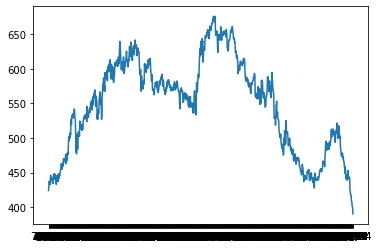

In [113]:
plt.plot(corn_prices['dates'], corn_prices['Close'])

In [114]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007/06/11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007/07/12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007/08/10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007/09/12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017/11/09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017/12/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018/01/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018/02/08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [115]:
corn_prices['dates'] = pd.to_datetime(corn_prices['dates'])
normalized_monthly_corn_data['Date'] = pd.to_datetime(normalized_monthly_corn_data['Date'])

In [116]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007-05-11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007-06-11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007-07-12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007-08-10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007-09-12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017-11-09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017-12-12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018-01-12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018-02-08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [117]:
price_years = []
for i in range(len(corn_prices['dates'])):
    price_years.append(corn_prices['dates'][i].year)
    
price_years = np.unique(price_years)

In [118]:
data_years = []
for i in range(len(normalized_monthly_corn_data['Date'])):
    data_years.append(normalized_monthly_corn_data['Date'][i].year)
    
data_years = np.unique(data_years)

In [119]:
to_add = []
for i in range(len(normalized_monthly_corn_data)-1):
    if (normalized_monthly_corn_data['Date'][i+1] - normalized_monthly_corn_data['Date'][i]).days > 0: 
        to_add.append((normalized_monthly_corn_data['Date'][i+1] - normalized_monthly_corn_data['Date'][i]).days)
    else:
        to_add.append(365 - (normalized_monthly_corn_data['Date'][i] - normalized_monthly_corn_data['Date'][i+1]).days)
to_add.append(30)

In [120]:
np.mean(to_add)

30.646153846153847

In [121]:
list(normalized_monthly_corn_data["Date"])

[Timestamp('2007-05-11 00:00:00'),
 Timestamp('2007-06-11 00:00:00'),
 Timestamp('2007-07-12 00:00:00'),
 Timestamp('2007-08-10 00:00:00'),
 Timestamp('2007-09-12 00:00:00'),
 Timestamp('2007-10-12 00:00:00'),
 Timestamp('2007-11-09 00:00:00'),
 Timestamp('2007-12-11 00:00:00'),
 Timestamp('2008-01-11 00:00:00'),
 Timestamp('2008-02-08 00:00:00'),
 Timestamp('2008-03-11 00:00:00'),
 Timestamp('2008-04-09 00:00:00'),
 Timestamp('2008-05-09 00:00:00'),
 Timestamp('2008-06-10 00:00:00'),
 Timestamp('2008-07-11 00:00:00'),
 Timestamp('2008-08-12 00:00:00'),
 Timestamp('2008-09-12 00:00:00'),
 Timestamp('2008-10-10 00:00:00'),
 Timestamp('2008-11-10 00:00:00'),
 Timestamp('2008-12-12 00:00:00'),
 Timestamp('2009-01-12 00:00:00'),
 Timestamp('2009-02-10 00:00:00'),
 Timestamp('2009-03-11 00:00:00'),
 Timestamp('2009-04-09 00:00:00'),
 Timestamp('2009-05-12 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-07-10 00:00:00'),
 Timestamp('2009-08-12 00:00:00'),
 Timestamp('2009-09-

In [122]:
numberr = 0
for add in to_add:
    numberr += add
numberr

3984

In [123]:
normalized_monthly_corn_data = normalized_monthly_corn_data.loc[normalized_monthly_corn_data.index.repeat(to_add)].reset_index(drop=True)

In [124]:
for i in range(1,len(normalized_monthly_corn_data)):
    normalized_monthly_corn_data['Date'][i] = normalized_monthly_corn_data['Date'][i-1]+timedelta(days=1)
normalized_monthly_corn_data

<ipython-input-124-44406f9f06c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_monthly_corn_data['Date'][i] = normalized_monthly_corn_data['Date'][i-1]+timedelta(days=1)


,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007-05-11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007-05-12,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
2,2007-05-13,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
3,2007-05-14,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
4,2007-05-15,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,2018-04-02,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3980,2018-04-03,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3981,2018-04-04,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3982,2018-04-05,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719


In [125]:
#corn_year_dict = {}

#for year in price_years:
#    corn_year_dict[year] = pd.DataFrame(columns = corn_prices.columns)
##    for i in range(len(corn_prices)):
 #       if corn_prices['dates'][i].year == year:
 #           corn_year_dict[year] = corn_year_dict[year].append(corn_prices.iloc[i,:])
 #           
 #   plt.plot(corn_year_dict[year]['dates'], corn_year_dict[year]['Close'])
 #   plt.show()

In [126]:
#corn_year_dict_new

In [31]:
#np.sort(corn_year_dict_new[key]['Close'])[-20]

In [135]:
#corn_year_dict_new[key]['Close']

In [139]:
corn_prices_new['Date'] = pd.to_datetime(corn_prices_new['Date'])

In [145]:
weather['Date'] = pd.to_datetime(weather['DATE'])
weather_subset = weather[weather['STATION'] == 'USW00014933']

full_data = corn_prices_new.merge(weather_subset, how = 'left', on = 'Date' )
full_data = full_data.merge(normalized_monthly_corn_data, how = 'left', on = 'Date' )
full_data

,Open,Close,High,Low,Volume,Date,STATION,LATITUDE,LONGITUDE,ELEVATION,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,3.7550,3.7500,3.7700,3.7275,NaN,2018-12-31,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.7450,3.7550,3.7750,3.7450,NaN,2018-12-28,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.7325,3.7450,3.7650,3.7325,NaN,2018-12-27,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.7825,3.7325,3.7925,3.7250,NaN,2018-12-26,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.7825,3.7775,3.7900,3.7525,NaN,2018-12-24,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,3.5975,3.6025,3.6100,3.5875,NaN,2007-04-04,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,3.4700,3.4850,3.5000,3.4700,NaN,2007-04-03,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,3.5600,3.5700,3.5725,3.5500,NaN,2007-04-02,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,0.0000,3.7450,3.9775,3.7400,NaN,2007-03-30,USW00014933,41.5338,-93.653,291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
subset = full_data[['Date', 'Close', 'High', 'Low','PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5','Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']]

def generate_time_lags(df,col, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n, col}"] = df_n[col].shift(n)
    #df_n = df_n.iloc[n_lags:]
    
    
    return df_n

df_generated = subset

for column in list(df_generated.keys())[1:]:
    df_generated = generate_time_lags(df_generated, column, 20)
df_generated


,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,"lag(11, 'Total Use')","lag(12, 'Total Use')","lag(13, 'Total Use')","lag(14, 'Total Use')","lag(15, 'Total Use')","lag(16, 'Total Use')","lag(17, 'Total Use')","lag(18, 'Total Use')","lag(19, 'Total Use')","lag(20, 'Total Use')"
0,2018-12-31,3.7500,3.7700,3.7275,0.11,35.0,20.0,23.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-28,3.7550,3.7750,3.7450,0.01,28.0,13.0,25.1,35.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-27,3.7450,3.7650,3.7325,0.90,54.0,28.0,31.1,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-26,3.7325,3.7925,3.7250,0.55,41.0,30.0,18.1,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-24,3.7775,3.7900,3.7525,0.00,36.0,19.0,13.0,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2007-04-04,3.6025,3.6100,3.5875,0.00,37.0,20.0,32.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,2007-04-03,3.4850,3.5000,3.4700,0.32,52.0,25.0,36.9,44.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,2007-04-02,3.5700,3.5725,3.5500,0.00,62.0,40.0,17.9,21.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,2007-03-30,3.7450,3.9775,3.7400,0.22,72.0,55.0,15.0,19.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
def make_year_dict(corn_price):
    price_years_new = []
    for i in range(len(corn_price['Date'])):
        price_years_new.append(corn_price['Date'][i].year)

    price_years_new = np.unique(price_years_new)
    
    to_delete = []
    for i in tqdm(range(len(corn_price))):
        if corn_price['Close'][i] ==0:
            to_delete.append(i)
            
        corn_price.drop(to_delete)
        corn_price = corn_price.reset_index(drop=True)
    
    corn_price = corn_price.sort_values(by = 'Date').reset_index(drop=True)
    
    corn_year_dict_new = {}

    i = 0
    for year in price_years_new:
        corn_year_dict_new[year] = pd.DataFrame(columns = corn_price.columns)

        while corn_price['Date'][i].month != 10 or corn_price['Date'][i].year != year:

        #for i in range(len(corn_prices_new)):
            #if corn_prices_new['Date'][i].year == year:
                corn_year_dict_new[year] = corn_year_dict_new[year].append(corn_price.iloc[i,:])
                i = i + 1

        corn_year_dict_new[year] = corn_year_dict_new[year].reset_index(drop=True)
        #plt.plot(corn_year_dict_new[year]['Date'], corn_year_dict_new[year]['Close'])
        #plt.show()
        
    return corn_year_dict_new

In [175]:
regular_dict = make_year_dict(full_data)

100%|██████████| 2957/2957 [00:04<00:00, 625.21it/s]


In [176]:
lagged_dict = make_year_dict(df_generated)

100%|██████████| 2957/2957 [00:19<00:00, 150.90it/s]


In [182]:
test = lagged_dict

In [185]:
file_to_write = open("/Users/evanlipton/Documents/GitHub/EENG439_CornPredictions/Data/data.pickle", "wb")
pickle.dump(test, file_to_write)



In [100]:
for i in range(len(corn_prices_new)):
    if corn_prices_new['Close'][i] ==0:
        corn_prices_new = corn_prices_new.drop(i)
corn_prices_new = corn_prices_new.reset_index(drop=True)

In [101]:
corn_prices_new = corn_prices_new.sort_values(by = 'Date').reset_index(drop=True)

In [ ]:
corn_year_dict_new = {}

i = 0
for year in price_years_new:
    corn_year_dict_new[year] = pd.DataFrame(columns = corn_prices_new.columns)
    
    while corn_prices_new['Date'][i].month != 10 or corn_prices_new['Date'][i].year != year:
        
    #for i in range(len(corn_prices_new)):
        #if corn_prices_new['Date'][i].year == year:
            corn_year_dict_new[year] = corn_year_dict_new[year].append(corn_prices_new.iloc[i,:])
            i = i + 1
    
    corn_year_dict_new[year] = corn_year_dict_new[year].reset_index(drop=True)
    plt.plot(corn_year_dict_new[year]['Date'], corn_year_dict_new[year]['Close'])
    plt.show()

In [166]:
def label(corn_year_dict_new):
    for key in corn_year_dict_new.keys():
        labels = []
        sell_threshold = np.sort(corn_year_dict_new[key]['Close'])[-20]
        buy_threshold = np.sort(corn_year_dict_new[key]['Close'])[20]
        for i in range(len(corn_year_dict_new[key])):
            if corn_year_dict_new[key]['Close'][i] >= sell_threshold:
                labels.append(1)
            elif corn_year_dict_new[key]['Close'][i] <= buy_threshold:
                labels.append(-1)
            else:
                labels.append(0)

        corn_year_dict_new[key]['Labels'] = labels

    return corn_year_dict_new

In [169]:
labeled_dict = label(regular_dict)
labeled_dict[2008]

,Open,Close,High,Low,Volume,Date,STATION,LATITUDE,LONGITUDE,ELEVATION,...,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks,Labels
0,3.7300,3.6875,3.7650,3.6800,66527.0,2007-10-01,USW00014933,41.5338,-93.653,291.7,...,-1.128923,-1.48211,2.550054,-2.072929,-0.16512,-0.993941,-0.947355,-1.712385,-1.455008,-1
1,3.6825,3.4875,3.6875,3.4875,94201.0,2007-10-02,USW00014933,41.5338,-93.653,291.7,...,-1.128923,-1.48211,2.550054,-2.072929,-0.16512,-0.993941,-0.947355,-1.712385,-1.455008,-1
2,3.4725,3.4450,3.5150,3.4225,111649.0,2007-10-03,USW00014933,41.5338,-93.653,291.7,...,-1.128923,-1.48211,2.550054,-2.072929,-0.16512,-0.993941,-0.947355,-1.712385,-1.455008,-1
3,3.4600,3.4225,3.4975,3.4100,63328.0,2007-10-04,USW00014933,41.5338,-93.653,291.7,...,-1.128923,-1.48211,2.550054,-2.072929,-0.16512,-0.993941,-0.947355,-1.712385,-1.455008,-1
4,3.4225,3.4225,3.4375,3.3950,52201.0,2007-10-05,USW00014933,41.5338,-93.653,291.7,...,-1.128923,-1.48211,2.550054,-2.072929,-0.16512,-0.993941,-0.947355,-1.712385,-1.455008,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,5.6100,5.6025,5.6175,5.4950,96078.0,2008-09-23,USW00014933,41.5338,-93.653,291.7,...,-0.382033,-1.49434,0.572274,-2.014996,0.89873,-0.592839,-0.947355,-1.479943,-0.069434,0
221,5.6025,5.6300,5.7400,5.5500,83344.0,2008-09-24,USW00014933,41.5338,-93.653,291.7,...,-0.382033,-1.49434,0.572274,-2.014996,0.89873,-0.592839,-0.947355,-1.479943,-0.069434,0
222,5.6100,5.5825,5.6550,5.5500,85206.0,2008-09-25,USW00014933,41.5338,-93.653,291.7,...,-0.382033,-1.49434,0.572274,-2.014996,0.89873,-0.592839,-0.947355,-1.479943,-0.069434,0
223,5.4050,5.1300,5.4225,5.1000,95946.0,2008-09-29,USW00014933,41.5338,-93.653,291.7,...,-0.382033,-1.49434,0.572274,-2.014996,0.89873,-0.592839,-0.947355,-1.479943,-0.069434,0


In [172]:
labeled_dict_lagged = label(lagged_dict)

labeled_dict_lagged[2008]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,"lag(12, 'Total Use')","lag(13, 'Total Use')","lag(14, 'Total Use')","lag(15, 'Total Use')","lag(16, 'Total Use')","lag(17, 'Total Use')","lag(18, 'Total Use')","lag(19, 'Total Use')","lag(20, 'Total Use')",Labels
0,2007-10-01,3.6875,3.7650,3.6800,0.00,75.0,58.0,21.0,30.0,0.501137,...,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-1
1,2007-10-02,3.4875,3.6875,3.4875,1.37,73.0,51.0,33.1,47.0,0.501137,...,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-1
2,2007-10-03,3.4450,3.5150,3.4225,0.00,74.0,47.0,16.1,19.9,0.501137,...,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-1
3,2007-10-04,3.4225,3.4975,3.4100,0.00,82.0,54.0,17.0,21.9,0.501137,...,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-1
4,2007-10-05,3.4225,3.4375,3.3950,0.00,85.0,67.0,25.9,33.1,0.501137,...,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-0.544219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2008-09-23,5.6025,5.6175,5.4950,0.04,82.0,64.0,21.0,25.9,0.695806,...,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,0
221,2008-09-24,5.6300,5.7400,5.5500,0.13,79.0,61.0,21.0,23.9,0.695806,...,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,0
222,2008-09-25,5.5825,5.6550,5.5500,0.00,80.0,57.0,15.0,17.0,0.695806,...,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,0
223,2008-09-29,5.1300,5.4225,5.1000,0.66,71.0,52.0,25.9,32.0,0.695806,...,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,-0.396391,0


In [33]:
for key in corn_year_dict_new.keys():
    labels = []
    sell_threshold = np.sort(corn_year_dict_new[key]['Close'])[-20]
    buy_threshold = np.sort(corn_year_dict_new[key]['Close'])[20]
    for i in range(len(corn_year_dict_new[key])):
        if corn_year_dict_new[key]['Close'][i] >= sell_threshold:
            labels.append(1)
        elif corn_year_dict_new[key]['Close'][i] <= buy_threshold:
            labels.append(-1)
        else:
            labels.append(0)

    corn_year_dict_new[key]['Labels'] = labels
        

In [34]:
corn_year_dict_new[2007]

,Open,Close,High,Low,Volume,Date,Labels
0,3.9500,3.9400,3.9425,3.9250,NaN,2007-03-29,1
1,0.0000,3.7450,3.9775,3.7400,NaN,2007-03-30,0
2,3.5600,3.5700,3.5725,3.5500,NaN,2007-04-02,0
3,3.4700,3.4850,3.5000,3.4700,NaN,2007-04-03,0
4,3.5975,3.6025,3.6100,3.5875,NaN,2007-04-04,0
...,...,...,...,...,...,...,...
123,3.7525,3.7350,3.8050,3.7050,89555.0,2007-09-24,0
124,3.7250,3.7175,3.7550,3.7075,65812.0,2007-09-25,0
125,3.7075,3.7500,3.7600,3.6825,67962.0,2007-09-26,0
126,3.7600,3.8675,3.8950,3.7450,107139.0,2007-09-27,1


In [35]:
weather['Date'] = pd.to_datetime(weather['DATE'])

In [36]:
weather_subset = weather[weather['STATION'] == 'USW00014933']

In [37]:
for key in corn_year_dict_new.keys():
    corn_year_dict_new[key] = corn_year_dict_new[key].merge(weather_subset, how = 'left', on = 'Date' )
    corn_year_dict_new[key] = corn_year_dict_new[key].merge(normalized_monthly_corn_data, how = 'left', on = 'Date')

In [38]:
list(corn_year_dict_new[2008].columns)

['Open',
 'Close',
 'High',
 'Low',
 'Volume',
 'Date',
 'Labels',
 'STATION',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'PRCP',
 'TMAX',
 'TMIN',
 'WDMV',
 'WSF2',
 'WSF5',
 'Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use',
 'Ending Stocks',
 'World BeginningStocks',
 'World Production',
 'World Imports',
 'World DomesticFeed',
 'World DomesticTotal',
 'World Exports',
 'World EndingStocks',
 'United States BeginningStocks',
 'United States Production',
 'United States Imports',
 'United States DomesticFeed',
 'United States DomesticTotal',
 'United States Exports',
 'United States EndingStocks',
 'Argentina BeginningStocks',
 'Argentina Production',
 'Argentina Imports',
 'Argentina DomesticFeed',
 'Argentina DomesticTotal',
 'Argentina Exports',
 'Argentina EndingStocks',
 'Brazil BeginningStocks',
 'Brazil Production',
 'Brazil 

In [45]:
from statsmodels.tsa.stattools import adfuller


In [46]:
test_result=adfuller(corn_year_dict_new[2008]['Close'])


In [47]:
test_result

(-1.5048946162363042,
 0.5310886676066703,
 0,
 224,
 {'1%': -3.459884913337196,
  '5%': -2.8745310704320794,
  '10%': -2.573693840082908},
 -225.26366483586656)

In [49]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(corn_year_dict_new[2008]['Close'])

ADF Test Statistic : -1.5048946162363042
p-value : 0.5310886676066703
#Lags Used : 0
Number of Observations : 224
weak evidence against null hypothesis,indicating it is non-stationary 


In [68]:
first_diff = corn_year_dict_new[2008]['Close'] - corn_year_dict_new[2008]['Close'].shift(5)
first_diff = first_diff[5:]

In [69]:
adfuller_test(first_diff)

ADF Test Statistic : -2.8530472623053944
p-value : 0.051086741470862465
#Lags Used : 15
Number of Observations : 204
weak evidence against null hypothesis,indicating it is non-stationary 


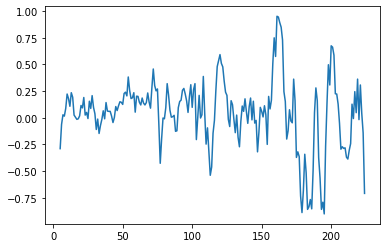

In [70]:
plt.plot(first_diff)

In [92]:
def generate_time_lags(df,col, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n, col}"] = df_n[col].shift(n)
    #df_n = df_n.iloc[n_lags:]
    return df_n

In [93]:
test_2008 = corn_year_dict_new[2008][['Labels', 'Date', 'Close', 'High', 'Low','PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5','Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']]

In [94]:
test_2008

,Labels,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
0,-1,2007-10-01,3.6875,3.7650,3.6800,0.00,75.0,58.0,21.0,30.0,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
1,-1,2007-10-02,3.4875,3.6875,3.4875,1.37,73.0,51.0,33.1,47.0,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
2,-1,2007-10-03,3.4450,3.5150,3.4225,0.00,74.0,47.0,16.1,19.9,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
3,-1,2007-10-04,3.4225,3.4975,3.4100,0.00,82.0,54.0,17.0,21.9,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
4,-1,2007-10-05,3.4225,3.4375,3.3950,0.00,85.0,67.0,25.9,33.1,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,2008-09-23,5.6025,5.6175,5.4950,0.04,82.0,64.0,21.0,25.9,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
221,0,2008-09-24,5.6300,5.7400,5.5500,0.13,79.0,61.0,21.0,23.9,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
222,0,2008-09-25,5.5825,5.6550,5.5500,0.00,80.0,57.0,15.0,17.0,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
223,0,2008-09-29,5.1300,5.4225,5.1000,0.66,71.0,52.0,25.9,32.0,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097


In [98]:
df_generated = test_2008
for column in list(test_2008.keys()):
    print(column)
    df_generated = generate_time_lags(df_generated, column, 20)
df_generated[]


Labels
Date
Close
High
Low
PRCP
TMAX
TMIN
WSF2
WSF5
Area Planted
Area Harvested
Yield
Beginning Stocks
Production
Imports
Total Supply
Feed and Residual
FSI
Ethanol
Total Domestic
Exports
Total Use


,Labels,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,...,"lag(11, 'Total Use')","lag(12, 'Total Use')","lag(13, 'Total Use')","lag(14, 'Total Use')","lag(15, 'Total Use')","lag(16, 'Total Use')","lag(17, 'Total Use')","lag(18, 'Total Use')","lag(19, 'Total Use')","lag(20, 'Total Use')"
0,-1,2007-10-01,3.6875,3.7650,3.6800,0.00,75.0,58.0,21.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,2007-10-02,3.4875,3.6875,3.4875,1.37,73.0,51.0,33.1,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,2007-10-03,3.4450,3.5150,3.4225,0.00,74.0,47.0,16.1,19.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,2007-10-04,3.4225,3.4975,3.4100,0.00,82.0,54.0,17.0,21.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,2007-10-05,3.4225,3.4375,3.3950,0.00,85.0,67.0,25.9,33.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,2008-09-23,5.6025,5.6175,5.4950,0.04,82.0,64.0,21.0,25.9,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
221,0,2008-09-24,5.6300,5.7400,5.5500,0.13,79.0,61.0,21.0,23.9,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
222,0,2008-09-25,5.5825,5.6550,5.5500,0.00,80.0,57.0,15.0,17.0,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
223,0,2008-09-29,5.1300,5.4225,5.1000,0.66,71.0,52.0,25.9,32.0,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097


In [89]:
list(test_2008.keys())

['Labels',
 'Date',
 'Close',
 'High',
 'Low',
 'PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5',
 'Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']